# Lecture Week 3 Wed 10/16

**Poll**
If I have some temperature measure in degree Celsius, compute the mean as 0 and variance 25. I convert the temperature to Fahrenheit, what will be the mean and variance of the temperature in Fahrenheit?
recall  that F = C * 9/5 + 32

E[aX+b] = a E[X] + b

Var[aX+b] = a^2 Var[X]

## Covariance

Covariance provides a measure of how two random variables change together. For example, if we treat weight and height as random variables, then knowing that someone is taller than average might make it more likely that they have above-average weight.

For random variables $X$ and $Y$, the covariance is defined as $\text{Cov}(X, Y) = E[(X - E[X])(Y - E[Y])]$.

## Correlation

Correlation is a standardized measure of how two random variables change together, ranging from -1 to 1.
$ \text{Corr}(X, Y) = \frac{\text{Cov}(X, Y)}{\sqrt{\text{Var}(X) \cdot \text{Var}(Y)}}$.


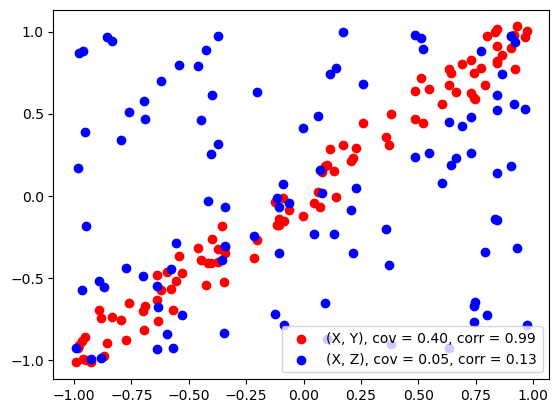

In [3]:
from matplotlib import pyplot as plt
import numpy as np

n = 100 # sample size

# X is a random variable uniformly distributed on [0, 1]
x = np.random.uniform(-1, 1, n)

# Y is a linear function of X plus noise
y = x + np.random.normal(0, 0.1, n)

# z is independent of X
z = np.random.uniform(-1, 1, n)

cov_xy = np.cov(x, y)[0, 1]
cov_xz = np.cov(x, z)[0, 1]

corr_xy = np.corrcoef(x, y)[0, 1]
corr_xz = np.corrcoef(x, z)[0, 1]

# scatter plot
fig, ax = plt.subplots()
# plot x vs y and x vs z, different colors, show name
ax.scatter(x, y, color='red', label='(X, Y), cov = %.2f, corr = %.2f' % (cov_xy, corr_xy))
ax.scatter(x, z, color='blue', label='(X, Z), cov = %.2f, corr = %.2f' % (cov_xz, corr_xz))
# show legend
ax.legend()
plt.show()



In [4]:
np.cov(x, y)

array([[0.39840063, 0.40003188],
       [0.40003188, 0.41129174]])

In [5]:
np.corrcoef(x, y)

array([[1.        , 0.98823356],
       [0.98823356, 1.        ]])

Text(0, 0.5, 'Y')

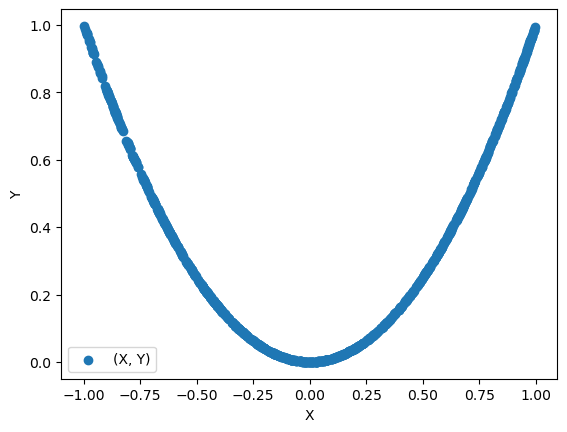

In [10]:
N = 1000
x = np.random.uniform(-1, 1, N)
y = x**2
plt.scatter(x, y, label='(X, Y)')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')

In [9]:
np.corrcoef(x, y)

array([[ 1.00000000e+00, -8.62213152e-04],
       [-8.62213152e-04,  1.00000000e+00]])

## Law of Large Numbers (the more the better)

Text(0, 0.5, 'estimated mean')

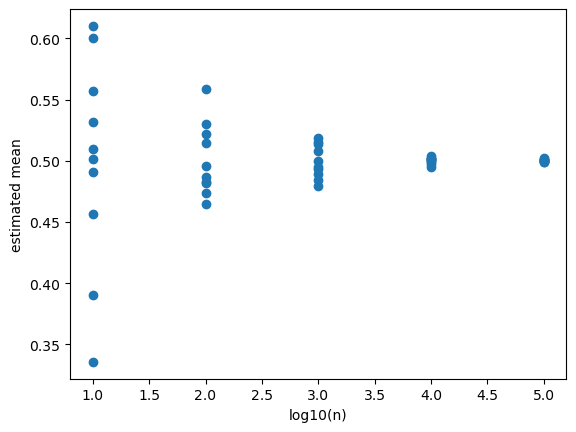

In [12]:
# In each experiment, we draw n samples and estimate the mean.
# For small n, each estimation might have large variability for different repetitions.
# As n increases, the variability decreases.
# For very large n, the estimates are almost the same as the true mean and the variability is very small.

# use n sample to estimate the mean
n = [10,100,1000,10000,100000]

# number of repetitions for each n
k = 10 

# store the estimates, each row is a different n, each column is a different repetition
estiamtes = np.zeros((len(n), k))

# sample sizes
logn = [] # log10 of n
means = [] # estimated mean

for ni in n:
    for k in range(10):
        # x = np.random.randint(1, 7, ni)
        x = np.random.uniform(0, 1, ni)
        logn.append(np.log10(ni))
        means.append(np.mean(x))

fig, ax = plt.subplots()
# scatter plot of 
ax.scatter(logn, means)
ax.set_xlabel('log10(n)')
ax.set_ylabel('estimated mean')

#### Central limit theorem (Why the normal distribution is so common)
Roughly speaking, sample average are normally distributed for large sample sizes, regardless of the distribution of the underlying random variable!




If $X_1, X_2, \ldots, X_n$ are independent and identically distributed random variables with mean $\mu$ and variance $\sigma^2$,
if we define 

$$ Z =  \frac{\sqrt{n}(\bar{X} - \mu)}{\sigma}$$

then for large n, Z is approximately normally distributed with mean 0 and variance 1.


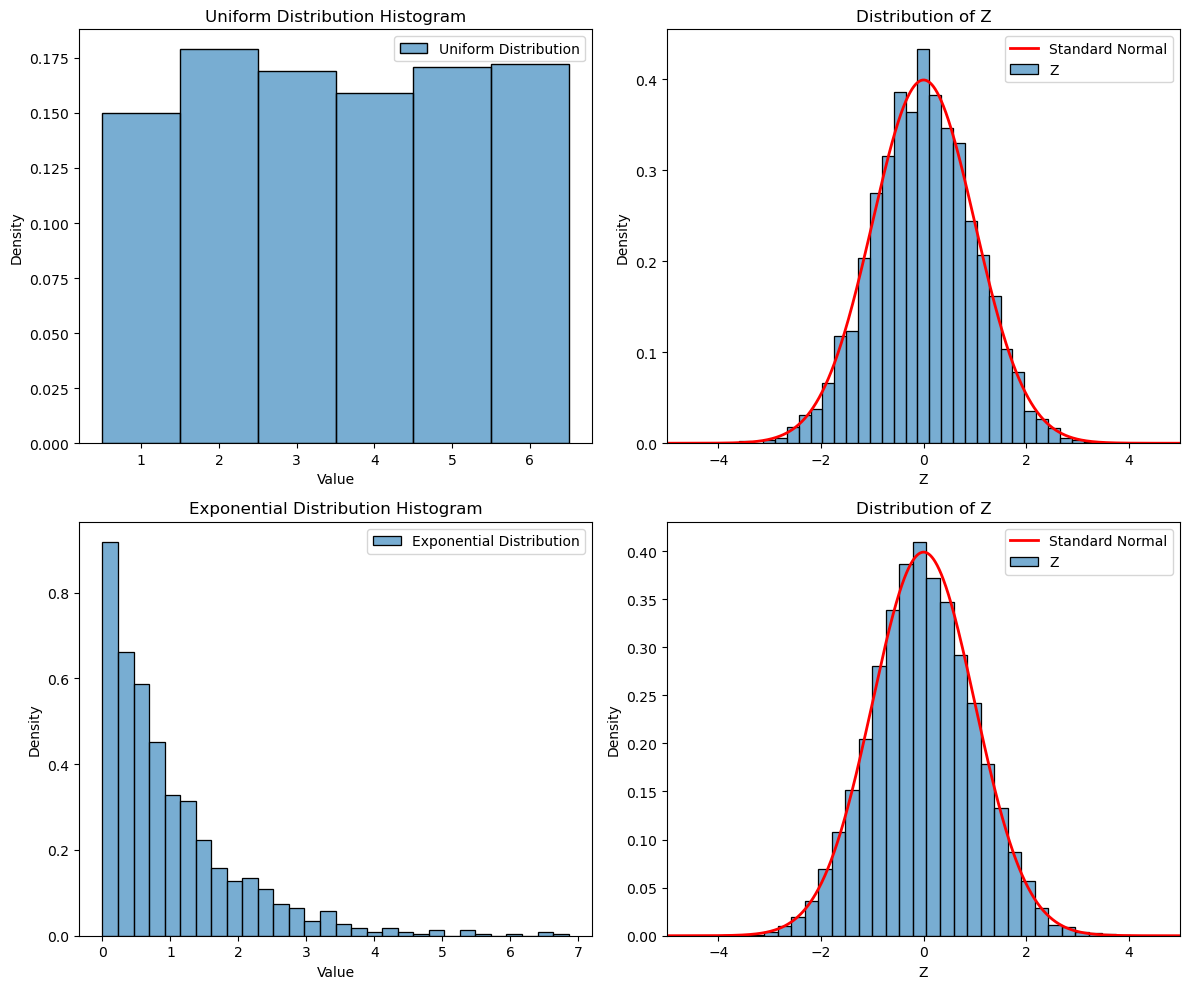

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Gaussian density function
gaussian_density = lambda x, mu, sigma: (1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu) ** 2 / (2 * sigma ** 2)))

# Parameters
N = 10000  # number of experiments
n = 1000   # number of samples per experiment

# Uniform Distribution
mu_uniform = (6 + 1) / 2  # mean of uniform distribution over [1, 6]
sigma_uniform = np.sqrt(((6 - 1 + 1) ** 2 - 1) / 12)  # standard deviation of uniform distribution over [1, 6]

uniform_samples = np.random.randint(1, 7, n)  # draw n samples from uniform integer distribution between 1 and 6
z_samples_uniform = []
for i in range(N):
    x = np.random.randint(1, 7, n)
    sample_mean = np.mean(x)
    z = np.sqrt(n) * (sample_mean - mu_uniform) / sigma_uniform
    z_samples_uniform.append(z)

# Exponential Distribution
lambda_exp = 1  # rate parameter for exponential distribution
mu_exp = 1 / lambda_exp
sigma_exp = 1 / lambda_exp

exp_samples = np.random.exponential(1 / lambda_exp, n)  # draw n samples from exponential distribution with rate 1
z_samples_exp = []
for i in range(N):
    x = np.random.exponential(1 / lambda_exp, n)
    sample_mean = np.mean(x)
    z = np.sqrt(n) * (sample_mean - mu_exp) / sigma_exp
    z_samples_exp.append(z)

# Plotting in 2-by-2 subfigures
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot original Uniform Distribution
sns.histplot(uniform_samples, discrete=True, kde=False, ax=axs[0, 0], edgecolor='black', stat='density', alpha=0.6, label='Uniform Distribution')
axs[0, 0].set_xlabel('Value')
axs[0, 0].set_ylabel('Density')
axs[0, 0].set_title('Uniform Distribution Histogram')
axs[0, 0].legend()

# Plot histogram of Z-transformed Uniform Distribution
sns.histplot(z_samples_uniform, bins=30, kde=False, ax=axs[0, 1], edgecolor='black', stat='density', alpha=0.6, label='Z')
x = np.linspace(-5, 5, 1000)
y = gaussian_density(x, 0, 1)
axs[0, 1].plot(x, y, linewidth=2, color='r', label='Standard Normal')
axs[0, 1].set_xlim(-5, 5)
axs[0, 1].set_xlabel('Z')
axs[0, 1].set_ylabel('Density')
axs[0, 1].set_title('Distribution of Z')
axs[0, 1].legend()

# Plot original Exponential Distribution
sns.histplot(exp_samples, bins=30, kde=False, ax=axs[1, 0], edgecolor='black', stat='density', alpha=0.6, label='Exponential Distribution')
axs[1, 0].set_xlabel('Value')
axs[1, 0].set_ylabel('Density')
axs[1, 0].set_title('Exponential Distribution Histogram')
axs[1, 0].legend()

# Plot histogram of Z-transformed Exponential Distribution
sns.histplot(z_samples_exp, bins=30, kde=False, ax=axs[1, 1], edgecolor='black', stat='density', alpha=0.6, label='Z')
axs[1, 1].plot(x, y, linewidth=2, color='r', label='Standard Normal')
axs[1, 1].set_xlim(-5, 5)
axs[1, 1].set_xlabel('Z')
axs[1, 1].set_ylabel('Density')
axs[1, 1].set_title('Distribution of Z')
axs[1, 1].legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [20]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset("penguins")

In [19]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [21]:
type(df)

pandas.core.frame.DataFrame

In [22]:
df.shape

(344, 7)

In [23]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [24]:
df['species']

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
339    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 344, dtype: object

In [25]:
df.species

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
339    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 344, dtype: object

In [26]:
type(df.species)

pandas.core.series.Series

In [28]:
df.bill_length_mm.mean()

43.9219298245614

In [30]:
df[0:2]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female


In [31]:
df['species'] == 'Adelie'

0       True
1       True
2       True
3       True
4       True
       ...  
339    False
340    False
341    False
342    False
343    False
Name: species, Length: 344, dtype: bool

In [32]:
df[df['species'] == 'Adelie']

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,Female
148,Adelie,Dream,36.0,17.8,195.0,3450.0,Female
149,Adelie,Dream,37.8,18.1,193.0,3750.0,Male
150,Adelie,Dream,36.0,17.1,187.0,3700.0,Female


In [33]:
df.loc[0:2, ['species', 'island']]

,species,island
0,Adelie,Torgersen
1,Adelie,Torgersen
2,Adelie,Torgersen


In [35]:
df.iloc[0:2, [0,4]]

,species,flipper_length_mm
0,Adelie,181.0
1,Adelie,186.0
